# 🧬 Sequence Alignment Visualizer

This mini-project performs **pairwise sequence alignment**:

- 🧬 Global alignment using Needleman-Wunsch
- 🧬 Local alignment using Smith-Waterman

We will:
- Upload two FASTA files
- Align them using BioPython
- Show aligned sequences and score

---


In [1]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 70.0 MB/s eta 0:00:00


In [2]:
from Bio import SeqIO, pairwise2
from Bio.pairwise2 import format_alignment
from google.colab import files

/usr/local/lib/python3.11/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## 📂 Upload Two FASTA Files
We’ll read two DNA or protein sequences from uploaded `.fasta` files.


In [4]:
# Upload both FASTA files
uploaded = files.upload()

# Read first two files
files_list = list(uploaded.keys())
record1 = SeqIO.read(files_list[0], "fasta")
record2 = SeqIO.read(files_list[1], "fasta")

print(f"✅ Sequence 1: {record1.id}, Length: {len(record1.seq)}")
print(f"✅ Sequence 2: {record2.id}, Length: {len(record2.seq)}")

Saving seq1.fasta to seq1.fasta


IndexError: list index out of range

In [10]:
# Upload both FASTA files
uploaded = files.upload()

# Read first two files
files_list = list(uploaded.keys())
record1 = SeqIO.read(files_list[0], "fasta")
record2 = SeqIO.read(files_list[1], "fasta")

print(f"✅ Sequence 1: {record1.id}, Length: {len(record1.seq)}")
print(f"✅ Sequence 2: {record2.id}, Length: {len(record2.seq)}")

Saving seq2.fasta to seq2 (1).fasta
Saving seq1.fasta to seq1 (3).fasta
✅ Sequence 1: seq2, Length: 32
✅ Sequence 2: seq1, Length: 32


## 🌍 Global Alignment (Needleman-Wunsch)

This tries to align **the full length of both sequences**, maximizing overall similarity.


In [11]:
alignments = pairwise2.align.globalxx(record1.seq, record2.seq)
best_alignment = alignments[0]

print(format_alignment(*best_alignment))
print(f"Alignment Score: {best_alignment[2]}")

ATGCGTT-CGTTAGCTAGA-TAGCTAGA-TAGCTA
||||| | ||||||||||  |||||||  ||||||
ATGCG-TACGTTAGCTAG-CTAGCTAG-CTAGCTA
  Score=29

Alignment Score: 29.0


## 🧬 Local Alignment (Smith-Waterman)

This finds the **best matching local region** (subsequences).


In [12]:
alignments_local = pairwise2.align.localxx(record1.seq, record2.seq)
best_local = alignments_local[0]

print(format_alignment(*best_local))
print(f"Local Alignment Score: {best_local[2]}")

ATGCGTT-CGTTAGCTAGA-TAGCTAGA-TAGCTA
||||| | ||||||||||  |||||||  ||||||
ATGCG-TACGTTAGCTAG-CTAGCTAG-CTAGCTA
  Score=29

Local Alignment Score: 29.0


## 📊 Alignment Match Visualization

This plot shows a **visual representation of your sequence alignment**:

- ✅ Green dots (`●`) mark positions where the sequences match.
- ❌ Red `x` marks positions where they mismatch or there are gaps.

This helps you quickly spot conserved regions and overall alignment quality.


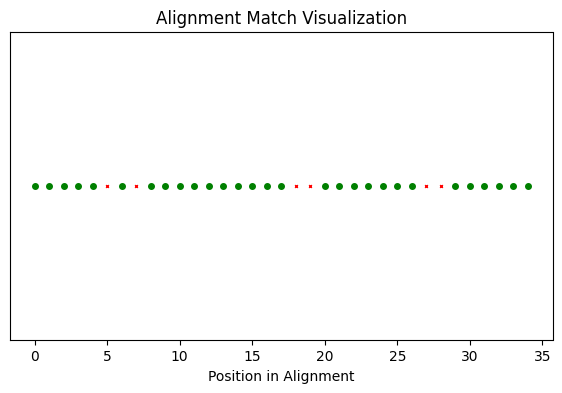

In [15]:
import matplotlib.pyplot as plt

# Extract aligned sequences from best global alignment
aligned_seq1 = best_alignment[0]
aligned_seq2 = best_alignment[1]

# Create a simple match line
match_line = []
for a, b in zip(aligned_seq1, aligned_seq2):
    if a == b:
        match_line.append('|')
    else:
        match_line.append(' ')

# Plot as a simple alignment figure
fig, ax = plt.subplots(figsize=(len(aligned_seq1)//5, 4))

# Plot alignment matches
for i, char in enumerate(match_line):
    if char == '|':
        ax.plot(i, 1, 'go', markersize=4)  # green dot for match
    else:
        ax.plot(i, 1, 'rx', markersize=2)  # red x for mismatch

ax.set_yticks([])
ax.set_title("Alignment Match Visualization")
ax.set_xlabel("Position in Alignment")
plt.show()

## ✅ Conclusion

This project demonstrated:
- Global alignment (Needleman-Wunsch)
- Local alignment (Smith-Waterman)
- Using BioPython's pairwise2 module


